<a href="https://colab.research.google.com/github/tbreton1/Estadistica/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("RSI11.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


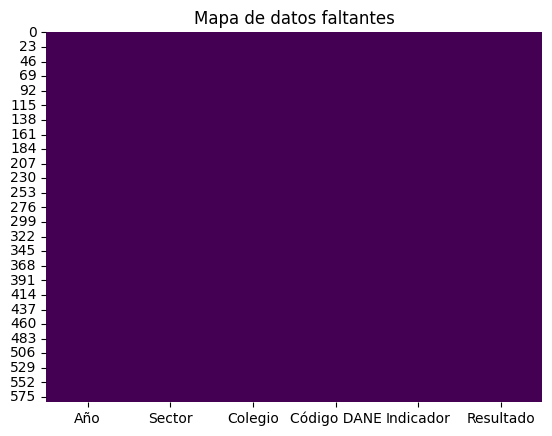

In [70]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Número de filas después de eliminar datos faltantes: 583

Datos faltantes por columna después de la limpieza:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


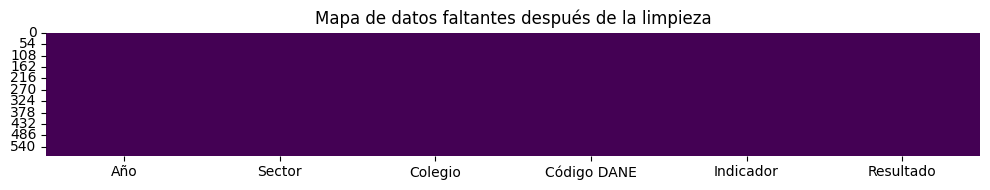

In [71]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

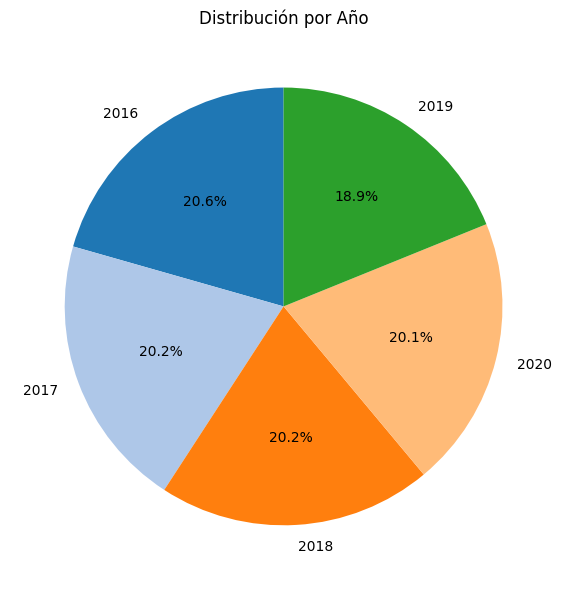

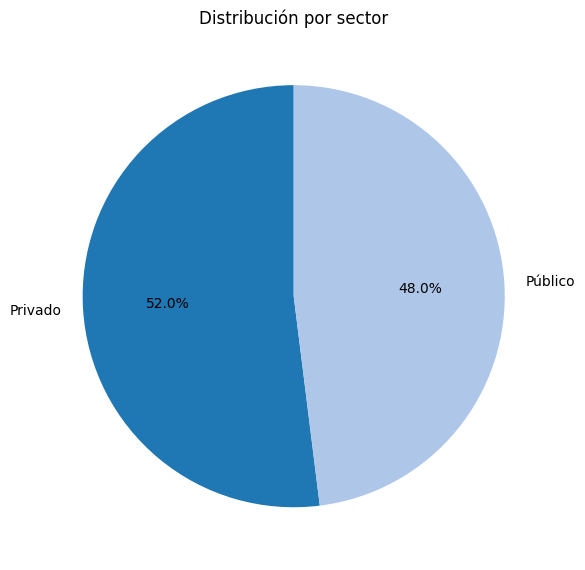

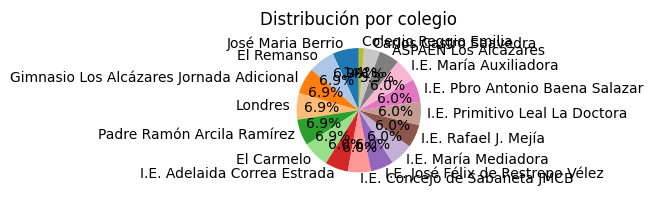

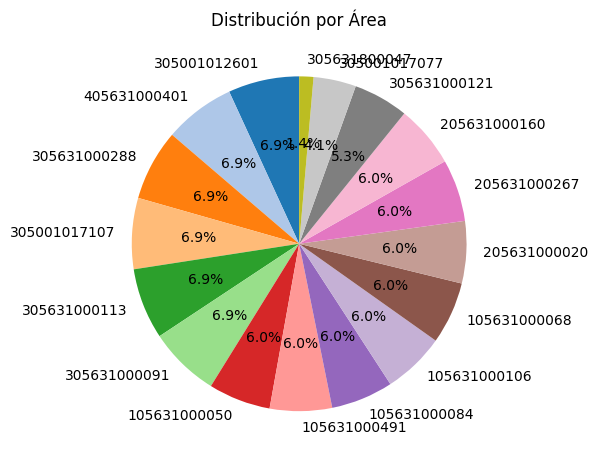

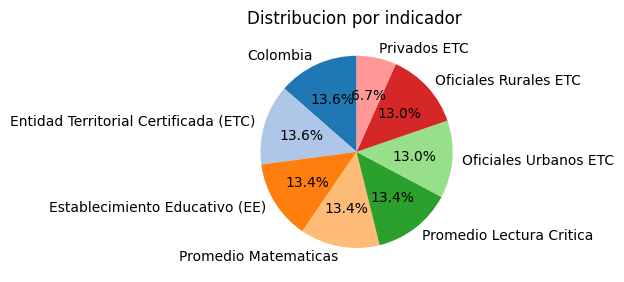

In [72]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('Año', 'Distribución por Año'),
    ('Sector', 'Distribución por sector'),
    ('Colegio', 'Distribución por colegio'),
    ('Código DANE', 'Distribución por Área'),
    ('Indicador', 'Distribucion por indicador ')
]

for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    df_filtrado[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

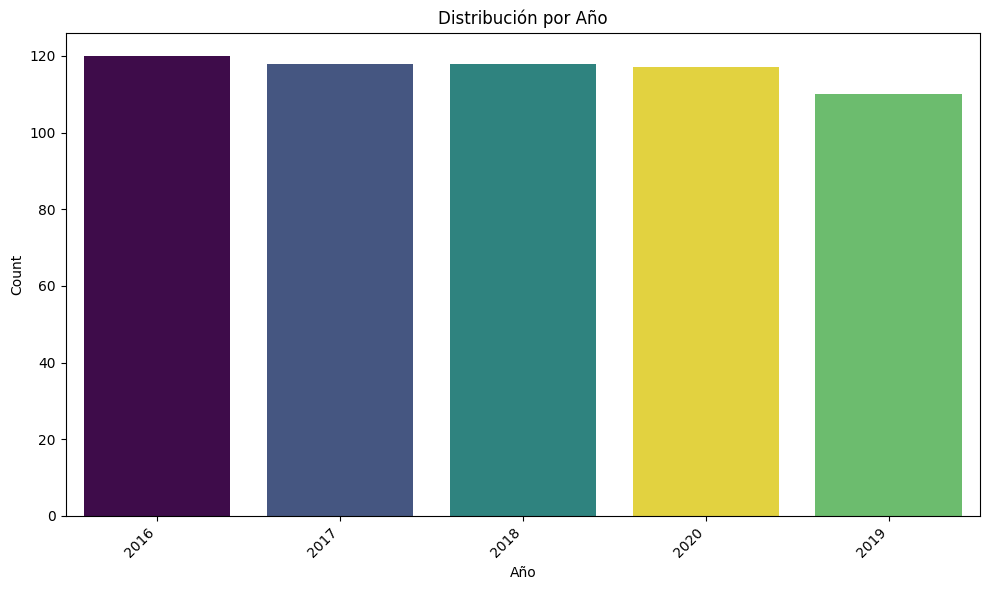

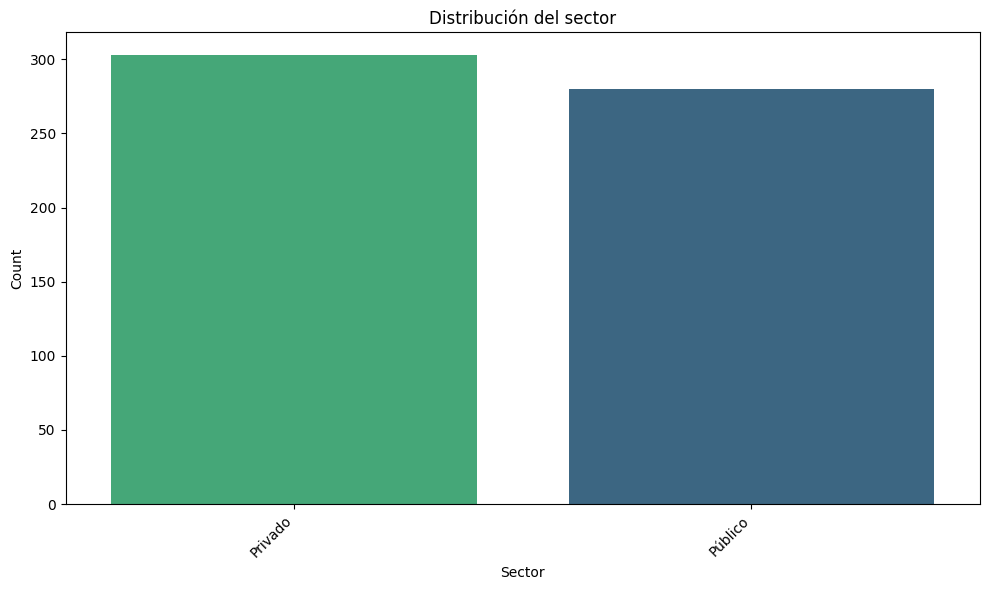

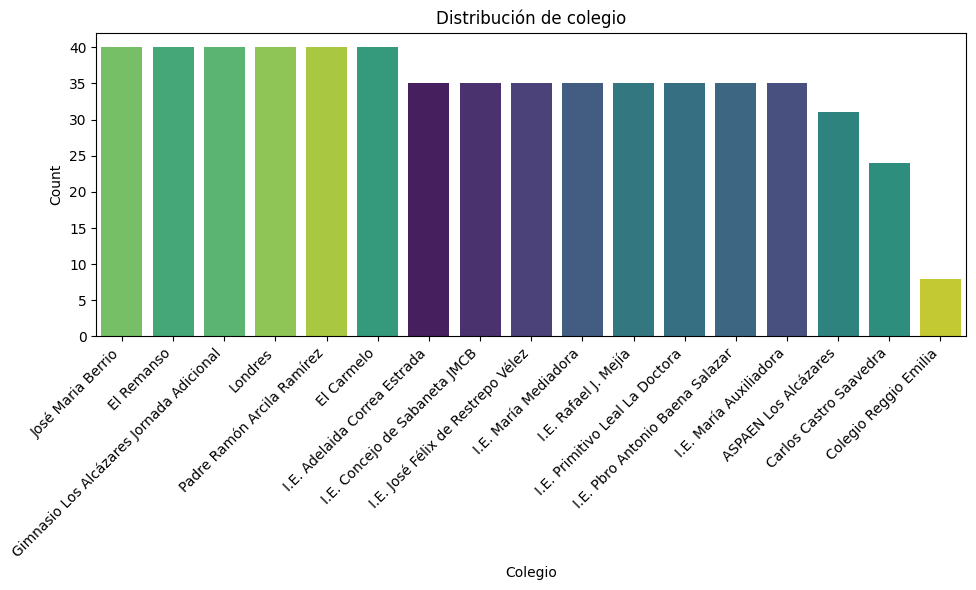

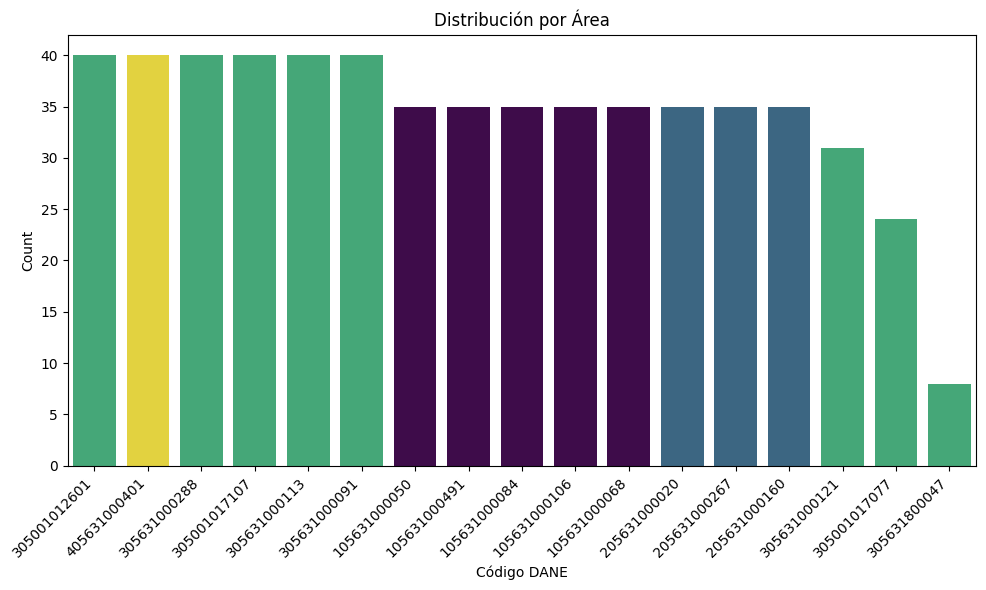

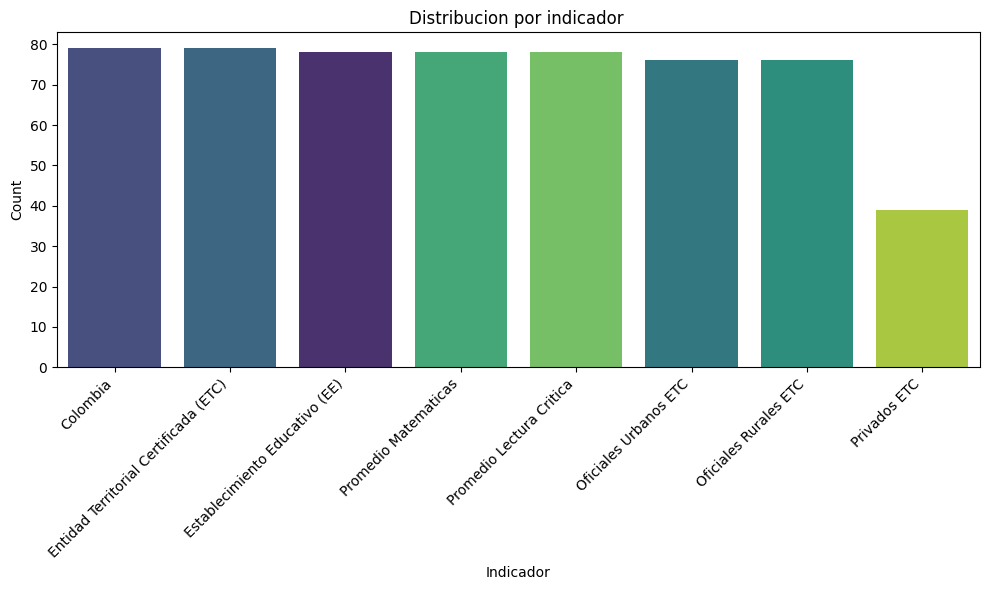

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas y títulos para los gráficos de barras
categorical_vars_bar = [
    ('Año', 'Distribución por Año'),
    ('Sector', 'Distribución del sector'),
    ('Colegio', 'Distribución de colegio'),
    ('Código DANE', 'Distribución por Área'),
    ('Indicador', 'Distribucion por indicador ')
]

for var, title in categorical_vars_bar:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtrado, x=var, order=df_filtrado[var].value_counts().index, palette='viridis', hue=var, legend=False)
    plt.title(title)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

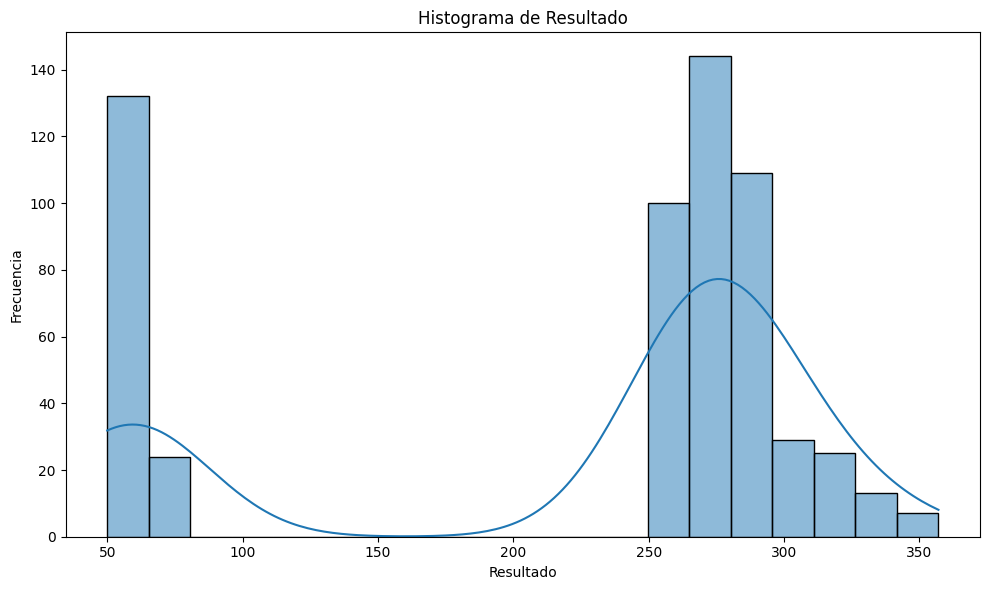

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x='Resultado', kde=True, bins=20)
plt.title('Histograma de Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

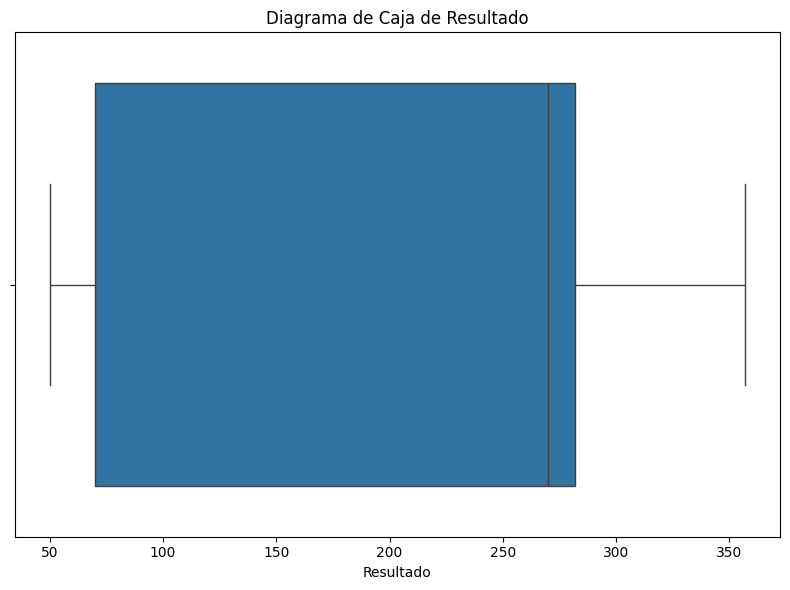

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtrado, x='Resultado')
plt.title('Diagrama de Caja de Resultado')
plt.xlabel('Resultado')
plt.tight_layout()
plt.show()

In [76]:
# Calcular Q1, Q3 e IQR para la columna 'Resultado'
Q1_resultado = df_filtrado['Resultado'].quantile(0.25)
Q3_resultado = df_filtrado['Resultado'].quantile(0.75)
IQR_resultado = Q3_resultado - Q1_resultado

# Definir los límites para considerar un dato como atípico en la columna 'Resultado'
limite_inferior_resultado = Q1_resultado - 1.5 * IQR_resultado
limite_superior_resultado = Q3_resultado + 1.5 * IQR_resultado

# Filtrar el DataFrame para eliminar outliers en la columna 'Resultado'
condicion_resultado = (df_filtrado['Resultado'] >= limite_inferior_resultado) & (df_filtrado['Resultado'] <= limite_superior_resultado)
df_sinatipicos_resultado = df_filtrado[condicion_resultado]

# Mostrar la cantidad de datos restantes y la cantidad de valores típicos
num_original_rows = len(df_filtrado)
num_rows_after_outlier_removal = len(df_sinatipicos_resultado)
num_outliers_removed = num_original_rows - num_rows_after_outlier_removal
num_typical_values = num_rows_after_outlier_removal

print(f"Número de outliers eliminados en 'Resultado': {num_outliers_removed}")
print(f"Número de datos restantes después de eliminar outliers en 'Resultado': {num_rows_after_outlier_removal}")
print(f"Número de valores típicos en 'Resultado': {num_typical_values}")

Número de outliers eliminados en 'Resultado': 0
Número de datos restantes después de eliminar outliers en 'Resultado': 583
Número de valores típicos en 'Resultado': 583


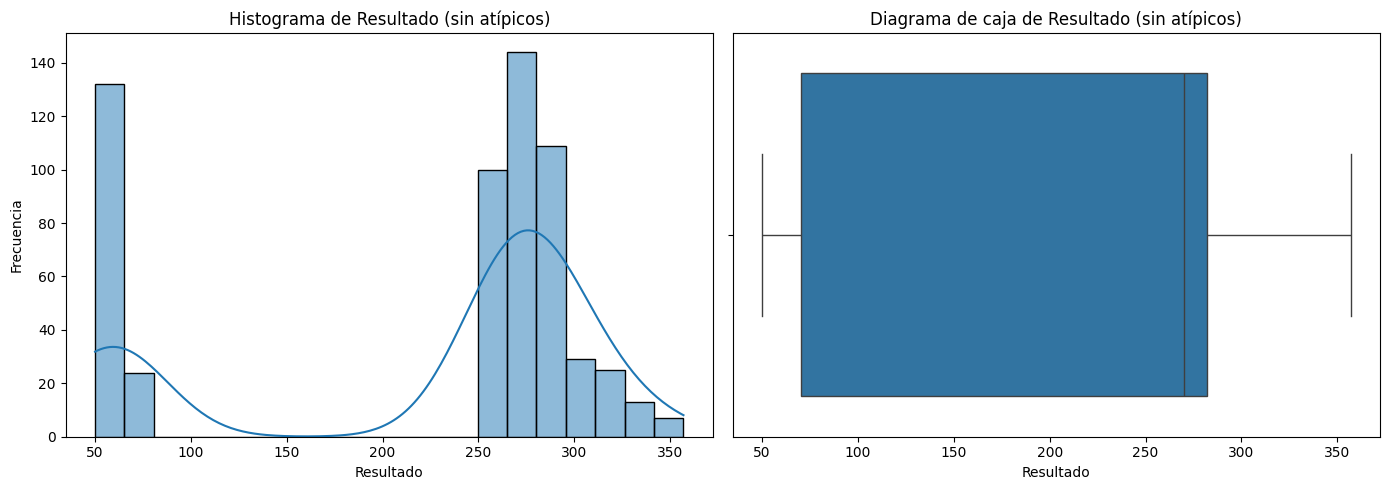

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma para Resultado
sns.histplot(data=df_sinatipicos_resultado, x='Resultado', bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Resultado (sin atípicos)')

# Boxplot para Resultado
sns.boxplot(data=df_sinatipicos_resultado, x='Resultado', ax=axes[1])
axes[1].set_xlabel('Resultado')
axes[1].set_title('Diagrama de caja de Resultado (sin atípicos)')

plt.tight_layout()
plt.show()

Resultados de los tests de normalidad (valores p):

Variable: Resultado
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 80.5745, Crítico (5%): 0.7820
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)



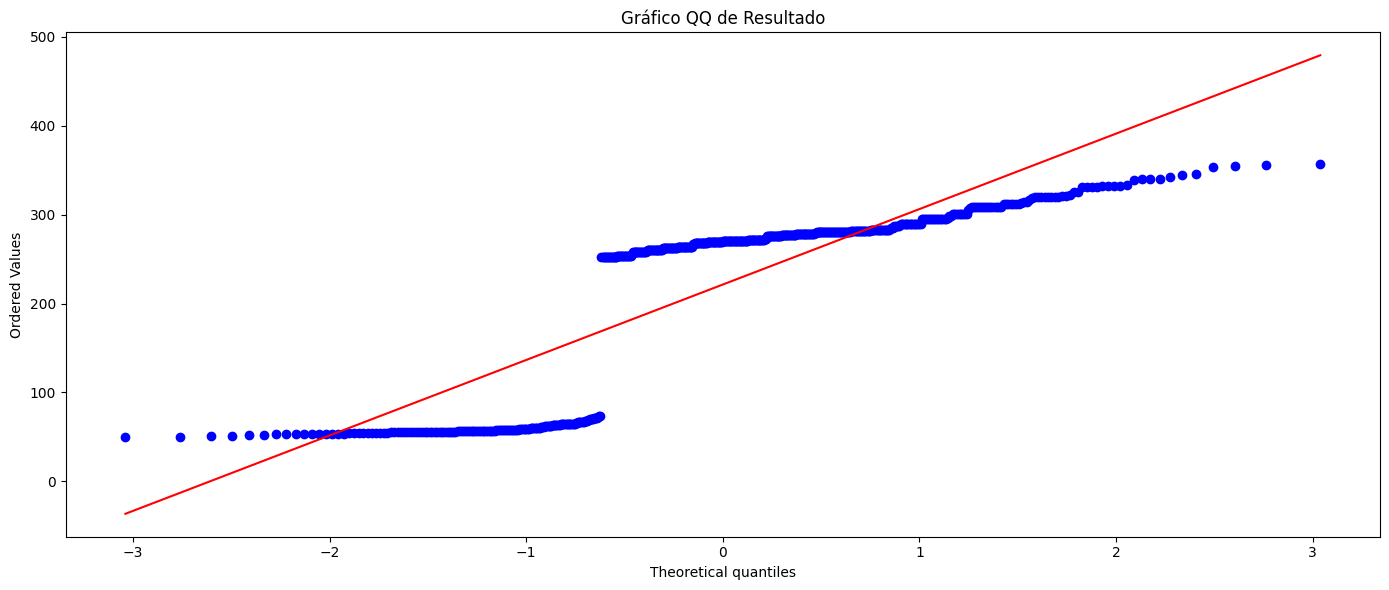

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['Resultado']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_fisicas:
    if col in df_filtrado.columns: # Use df_filtrado as it's already loaded and doesn't have missing values
        datos = df_filtrado[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, len(columnas_fisicas), figsize=(14, 6))
if len(columnas_fisicas) == 1:
    axes = [axes] # Make axes an iterable for single plot case

for i, col in enumerate(columnas_fisicas):
    if col in df_filtrado.columns:
        probplot(df_filtrado[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()